# Online Apparel Clickstream Analysis and Pricing Strategy

This notebook contains the complete code implementation for the project **"Analyzing Behavioral and Pricing Patterns in an Online Clothing Store Using Clickstream Data."**

The project explores user behavior, product-level features, and price perception using a real-world e-commerce dataset. It combines exploratory data analysis, regression and classification modeling, and anomaly detection to uncover actionable business insights.

---

## Project Objectives:
- Understand sales trends, customer preferences, and product performance from clickstream data.
- Predict product prices using machine learning models (Random Forest, XGBoost, Linear Regression).
- Classify products into pricing tiers (budget vs premium) based on behavior and metadata.
- Detect **pricing–perception mismatches** using residual analysis and classification flags.

---

## Dataset:
The dataset used is a publicly available **online retail clickstream dataset from 2008**, containing product metadata and session-level purchase activity.

---

##  Techniques Used:
- Data cleaning and preprocessing (handling missing values, feature engineering)
- Exploratory Data Analysis (EDA)
- Regression modeling for price prediction
- Classification modeling for pricing tiers
- Residual-based mispricing detection
- Association rule mining to analyze product bundling behavior

---

## Tools & Libraries:
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Scikit-learn
- XGBoost
- mlxtend (for association rules)
- Jupyter Notebook

---



#### ***Importing Libraries***

We begin by importing essential Python libraries for data analysis and visualization.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
import os
print(os.getcwd())


c:\Users\Miali\python\e-shop clothing 2008.csv


#### ***Loading the Dataset***

We load the **e-shop clothing dataset** using `pandas.read_csv()`. The file is semicolon-delimited (`sep=';'`).  
The column names are printed to get an initial overview of the dataset structure.

In [14]:
df = pd.read_csv('C:\\Users\\Miali\\python\\Clickstream Analysis\\Clickstream Analysis.csv', sep=';')

print("\nColumns:", df.columns.tolist())



Columns: ['year', 'month', 'day', 'order', 'country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']


#### ***Dataset Dimensions***

We check the shape of the dataset using `df.shape`, which returns the number of rows and columns.  
This helps us understand the dataset size before proceeding with analysis.


In [15]:
df.shape

(165474, 14)

#### ***Previewing the Data***


In [16]:
df.head(10)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
5,2008,4,1,6,29,1,3,C56,6,1,2,57,1,4
6,2008,4,1,7,29,1,3,C57,5,1,2,33,2,4
7,2008,4,1,8,29,1,4,P67,9,5,1,38,1,4
8,2008,4,1,9,29,1,4,P82,6,4,2,48,1,5
9,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2


#### ***Variable Descriptions***

1. **`year`**  
   - The year when the session took place (always 2008).

2. **`month`**  
   - Month of the session, ranging from April (4) to August (8).

3. **`day`**  
   - Day of the month when the session occurred.

4. **`order`**  
   - Sequence number of clicks within a single session.

5. **`country`**  
   - Country code based on the user's IP address.

6. **`session ID`**  
   - Unique identifier for each session (short record).

7. **`page 1 (main category)`**  
   - Main product category:  
     `1` – Trousers  
     `2` – Skirts  
     `3` – Blouses  
     `4` – Sale items

8. **`page 2 (clothing model)`**  
   - Specific clothing model (217 unique products).

9. **`colour`**  
   - Encoded color of the product:  
     `1` – Beige  
     `2` – Black  
     `3` – Blue  
     `4` – Brown  
     `5` – Burgundy  
     `6` – Gray  
     `7` – Green  
     `8` – Navy Blue  
     `9` – Multi-colored  
     `10` – Olive  
     `11` – Pink  
     `12` – Red  
     `13` – Violet  
     `14` – White

10. **`location`**  
    - Placement of the product image on the web page:  
      `1` – Top Left  
      `2` – Top Center  
      `3` – Top Right  
      `4` – Bottom Left  
      `5` – Bottom Center  
      `6` – Bottom Right

11. **`model photography`**  
    - Image orientation:  
      `1` – Frontal (en face)  
      `2` – Profile

12. **`price`**  
    - Product price in USD.

13. **`price 2`**  
    - Indicates if the product price is higher than the category average:  
      `1` – Yes  
      `2` – No

14. **`page`**  
    - Page number on the e-store (ranges from 1 to 5).


#### ***Research Questions***

Based on my exploration of the dataset and the business context of online apparel retail, I formulated the following research questions to guide this analysis. These questions reflect a combined focus on customer behavior, pricing strategy, and the practical application of machine learning to support data-driven decision-making.

1. **What temporal and product-level revenue patterns can be identified, and how do product attributes like category, color, and photography style influence pricing tiers and purchasing outcomes?**

2. **To what extent can product attributes predict a product’s price using machine learning models, and which features are most influential in determining price?**

3. **How can a combination of predicted price and perceived price tier be used to flag products with potential pricing–perception gaps for further business review?**

In this notebook, I aim to explore these questions through descriptive analysis, predictive modeling, and actionable business insights. By the end, the goal is to uncover patterns in customer behavior, identify factors affecting pricing, and highlight products where pricing may not align with perceived value, ultimately supporting smarter pricing and merchandising decisions.



Before diving into the analysis, we first check the dataset for any **missing values** or **duplicate records**, which can skew results or introduce bias.

- **Missing Values**:  
  We use `df.isnull().sum()` to check for null entries across all columns.  
  
- **Duplicate Records**:  
 We check for duplicates using `df.duplicated().sum()`. 

In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns with missing data
missing_values[missing_values > 0]


Series([], dtype: int64)

In [18]:
# Total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")




Total duplicate rows: 0


**Observations**

In this dataset, no missing values are present, so no imputation is necessary. No duplicate records are present either. 

### ***Data Types Overview***

We inspect the data types of each column using `df.dtypes`.  
This helps identify whether variables are numerical, categorical, or object-type, which is essential for choosing the right preprocessing and modeling techniques later on.


In [19]:
df.dtypes

year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
session ID                  int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
dtype: object

- **Integer columns** (e.g., `year`, `month`, `price`) are treated as numerical.
- **Object columns** (e.g., `page 2 (clothing model)`) indicate non-numeric identifiers that may need encoding.

In [20]:
print(df['page 2 (clothing model)'].unique()[:10])  # peek at values
print(f"Unique models: {df['page 2 (clothing model)'].nunique()}")


['A13' 'A16' 'B4' 'B17' 'B8' 'C56' 'C57' 'P67' 'P82' 'B31']
Unique models: 217


**Inspecting Object-Type Column: Product Model**

Upon inspecting the data types, `page 2 (clothing model)` was the **only column with an object data type**.  
To ensure consistency and proper analysis, we examined its values:

- Displayed the first 10 unique product model codes.
- Found that there are **217 unique models** in total.

Since this column serves as a **product identifier**, no conversion is needed unless required for modeling or encoding later.


#### ***Monthly Sales Volume Overview***

We now explore how **sales volume is distributed across the months** in the dataset.  
Understanding monthly sales trends is essential for identifying periods of high or low customer activity and for interpreting any seasonality or data completeness issues that may impact further analysis.


In [21]:
# Combine year, month, day into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


# Count purchases per month
monthly_sales = df['order'].groupby(df['date'].dt.to_period('M')).size().reset_index(name='monthly_sales')

# Convert the 'date' back to datetime format so it can be plotted
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

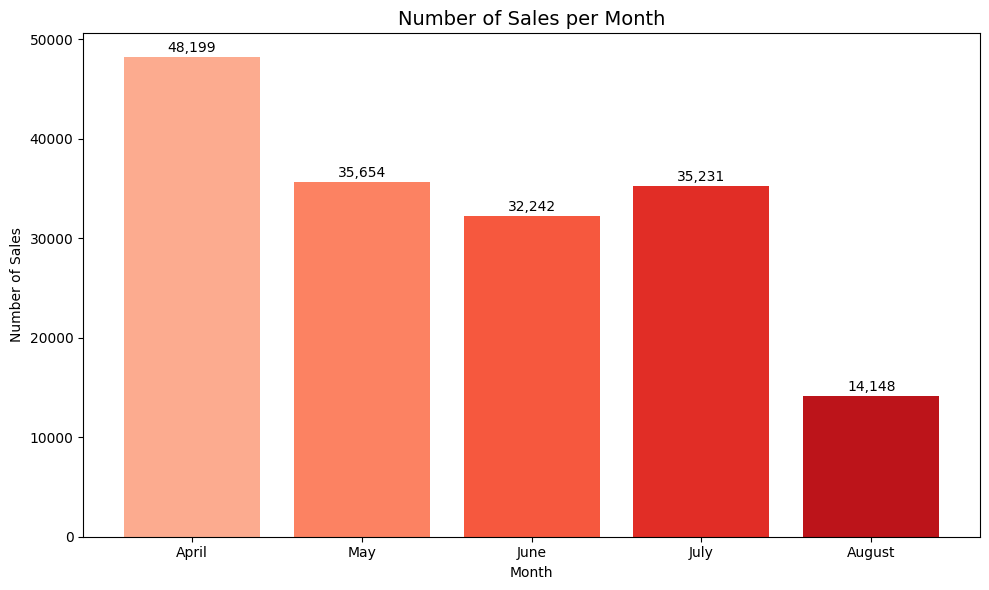

In [22]:

# Sort the monthly data 
monthly_sales = monthly_sales.sort_values('date')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales['date'].dt.strftime('%B'), monthly_sales['monthly_sales'], color=plt.cm.Reds(np.linspace(0.3, 0.8, len(monthly_sales))))

# Labels and title
plt.title("Number of Sales per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Sales")

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval):,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()



***Key Observations***

- **April** has the highest number of purchases, indicating peak customer activity.
- **August** shows a sharp drop, likely due to **incomplete data** for that month. - should be looked into. 
- Monthly sales volume is relatively stable from **May to July* 


#### ***Daily Sales Distribution by Month and Aggregate Trends***

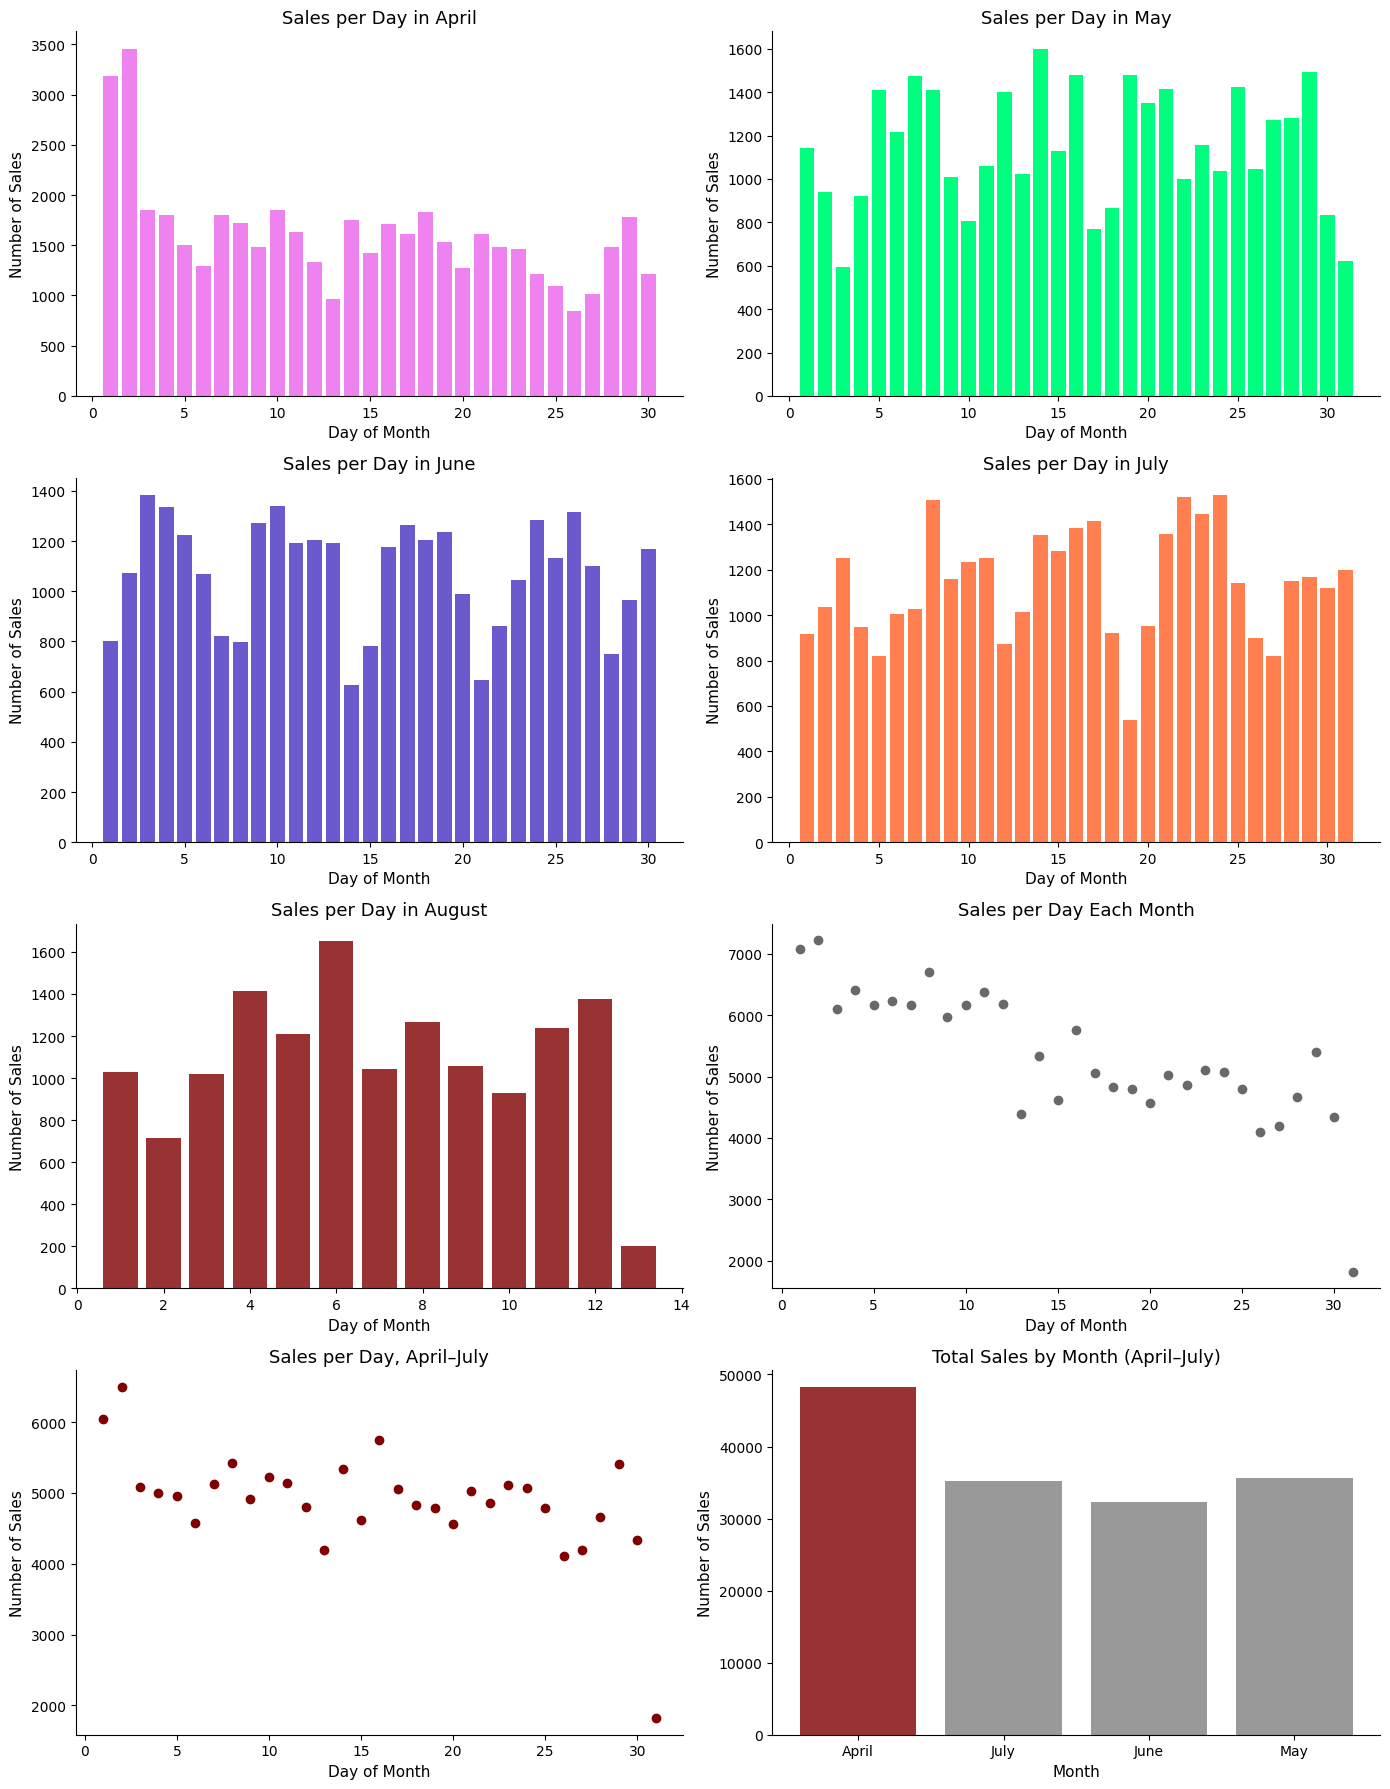

In [23]:

# Create columns for month name and day of month
df['Month'] = df['date'].dt.strftime('%B')
df['Day'] = df['date'].dt.day

# DataFrames for each month
csap = df[df['Month'] == 'April']
csmy = df[df['Month'] == 'May']
csjn = df[df['Month'] == 'June']
csjl = df[df['Month'] == 'July']
csau = df[df['Month'] == 'August']

csna = df[df['Month'] != 'August']  # April–July combined
csnac = csna['Month'].value_counts().sort_index()  # Total purchase count per month

# Create 4x2 subplot grid
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.6)

# Helper function to set axes cleanly
def set_labels(ax, xlabel="Day of Month", ylabel="Number of Sales"):
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.spines[['right', 'top']].set_visible(False)

# April
axs[0,0].bar(csap['Day'].value_counts().sort_index().index,
             csap['Day'].value_counts().sort_index().values,
             color='violet')
axs[0,0].set_title('Sales per Day in April', fontsize=13)
set_labels(axs[0,0])

# May
axs[0,1].bar(csmy['Day'].value_counts().sort_index().index,
             csmy['Day'].value_counts().sort_index().values,
             color='springgreen')
axs[0,1].set_title('Sales per Day in May', fontsize=13)
set_labels(axs[0,1])

# June
axs[1,0].bar(csjn['Day'].value_counts().sort_index().index,
             csjn['Day'].value_counts().sort_index().values,
             color='slateblue')
axs[1,0].set_title('Sales per Day in June', fontsize=13)
set_labels(axs[1,0])

# July
axs[1,1].bar(csjl['Day'].value_counts().sort_index().index,
             csjl['Day'].value_counts().sort_index().values,
             color='coral')
axs[1,1].set_title('Sales per Day in July', fontsize=13)
set_labels(axs[1,1])

# August
axs[2,0].bar(csau['Day'].value_counts().sort_index().index,
             csau['Day'].value_counts().sort_index().values,
             color='maroon', alpha=0.8)
axs[2,0].set_title('Sales per Day in August', fontsize=13)
set_labels(axs[2,0])

# All-month daily sales (scatter)
axs[2,1].scatter(df['Day'].value_counts().sort_index().index,
                 df['Day'].value_counts().sort_index().values,
                 color='dimgray')
axs[2,1].set_title('Sales per Day Each Month', fontsize=13)
set_labels(axs[2,1])

# April–July only (scatter)
axs[3,0].scatter(csna['Day'].value_counts().sort_index().index,
                 csna['Day'].value_counts().sort_index().values,
                 color='maroon')
axs[3,0].set_title('Sales per Day, April–July', fontsize=13)
set_labels(axs[3,0])

# Total sales by month
highlight_colors = ['maroon' if month == 'April' else 'gray' for month in csnac.index]
axs[3,1].bar(csnac.index, csnac.values, color=highlight_colors, alpha=0.8)
axs[3,1].set_title('Total Sales by Month (April–July)', fontsize=13)
set_labels(axs[3,1], xlabel="Month")

plt.tight_layout()
plt.show()


***Key Observations***

-  **Sales drop sharply after August 13**, confirming incomplete data for that month.
-  **May, June, and July** show stable daily patterns with no major spikes or dips.
-  **April 1st saw an abnormal sales spike** (>3,500 purchases), likely due to a promotion or timestamp anomaly.
-  **April has the highest total purchases (~48,000)**, but this is driven by early-month spikes, not sustained performance.
-  **Sales tend to peak in the first 5 days of each month** and decline after Day 14 — suggesting a recurring monthly behavior pattern.


#### ***Revenue Share by Month***

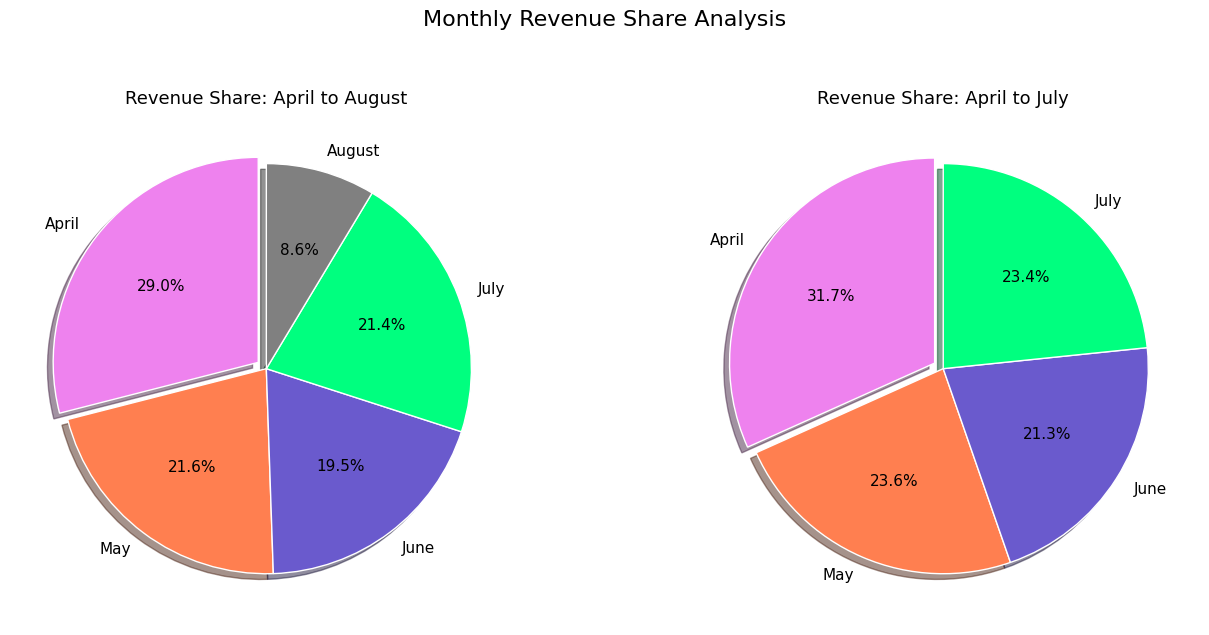

In [24]:

# Group revenue
revenue_all = df.groupby('Month')['price'].sum()
revenue_all = revenue_all[['April', 'May', 'June', 'July', 'August']]  # order

revenue_clean = csna.groupby('Month')['price'].sum()
revenue_clean = revenue_clean[['April', 'May', 'June', 'July']]  # order

# Set color palette
colors_all = ['violet', 'coral', 'slateblue', 'springgreen', 'gray']
colors_clean = ['violet', 'coral', 'slateblue', 'springgreen']

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Monthly Revenue Share Analysis', fontsize=16, y=1.05)

# Pie chart 1: April to August
ax[0].pie(revenue_all,
          labels=revenue_all.index,
          autopct='%1.1f%%',
          explode=[0.05, 0, 0, 0, 0],
          shadow=True,
          startangle=90,
          colors=colors_all,
          textprops={'fontsize': 11},
          wedgeprops={'edgecolor': 'white'})
ax[0].set_title('Revenue Share: April to August', fontsize=13)

# Pie chart 2: April to July
ax[1].pie(revenue_clean,
          labels=revenue_clean.index,
          autopct='%1.1f%%',
          explode=[0.05, 0, 0, 0],
          shadow=True,
          startangle=90,
          colors=colors_clean,
          textprops={'fontsize': 11},
          wedgeprops={'edgecolor': 'white'})
ax[1].set_title('Revenue Share: April to July', fontsize=13)

plt.tight_layout()
plt.show()


 ***Key Observations:***

-  **April contributed ~29% of total revenue**, and rises to **31.7%** when August is excluded, confirming it as the highest-performing month.
-  **August shows only 8.6%** of total revenue, due to missing data beyond Day 13.
-  **June has the lowest revenue share** (21.3%) among the complete months.
-  **May (23.6%)**, **June (21.3%)**, and **July (23.4%)** show **consistent and steady revenue performance**, reflecting stable sales.

***Possible Reasons for April’s Revenue Spike:***

- **Marketing push or seasonal campaign** may have boosted sales in early April (e.g., Day 1 spike).
- Potential **restocking of in-demand items** could have driven purchase surges.
- **Seasonal demand shift** at the start of spring/summer may have led to bulk purchases in certain categories (e.g., maternity or baby wear).


#### ***Category-Level Pricing Analysis: Budget vs Premium***

In [25]:
category_mapping = {
    1: 'Trousers',
    2: 'Skirts',
    3: 'Blouses',
    4: 'Sale'
}

# Count of items sold per type
type_counts = df['page 1 (main category)'].value_counts()

# Total revenue per type
type_revenue = df.groupby('page 1 (main category)')['price'].sum()

# Average price per type
type_avg_price = df.groupby('page 1 (main category)')['price'].mean()

# Combine into one DataFrame
type_summary = type_revenue.to_frame(name='Total Revenue (USD)')
type_summary['Items Sold'] = type_counts
type_summary['Avg Price per Item'] = type_avg_price
type_summary = type_summary.rename(index=category_mapping)


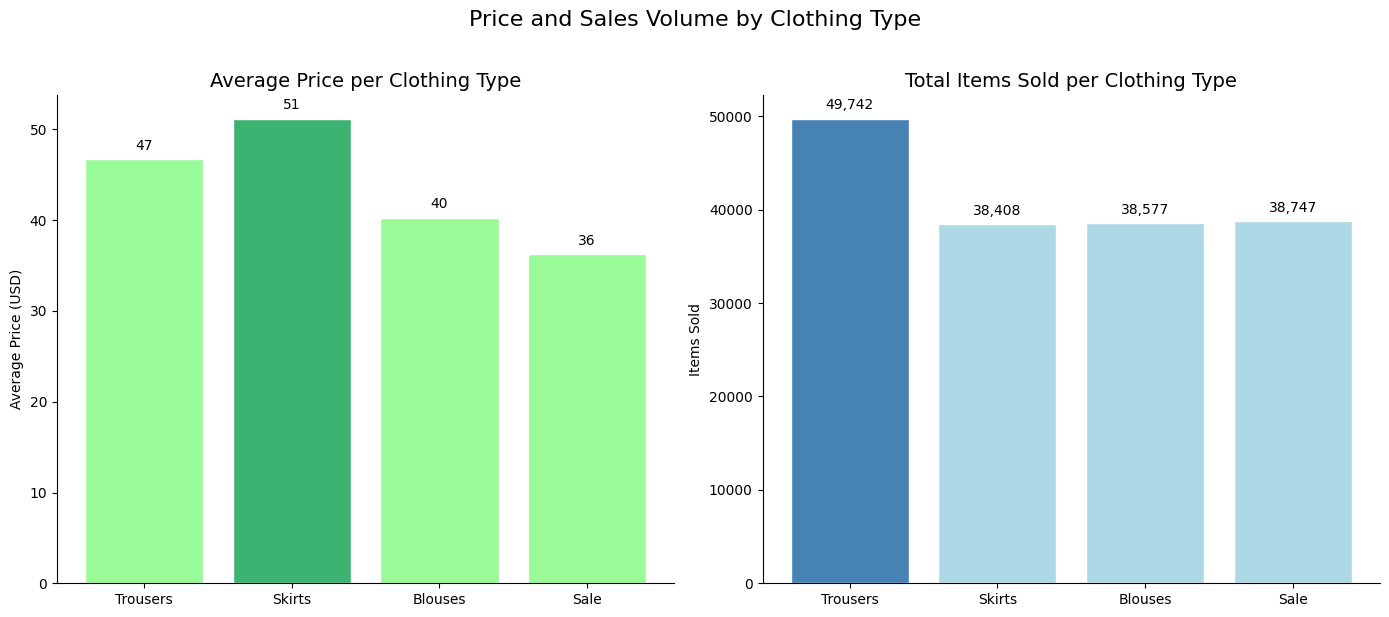

In [26]:

# Get index of max values
max_avg_idx = type_summary['Avg Price per Item'].idxmax()
max_count_idx = type_summary['Items Sold'].idxmax()

# Set bar colors dynamically
avg_colors = ['mediumseagreen' if idx == max_avg_idx else 'palegreen' for idx in type_summary.index]
count_colors = ['steelblue' if idx == max_count_idx else 'lightblue' for idx in type_summary.index]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Price and Sales Volume by Clothing Type", fontsize=16, y=1.02)

# --- Left Plot: Average Price per Clothing Type ---
bars1 = ax[0].bar(type_summary.index,
                  type_summary['Avg Price per Item'],
                  color=avg_colors,
                  edgecolor='white')

ax[0].set_title('Average Price per Clothing Type', fontsize=14)
ax[0].set_ylabel('Average Price (USD)')
ax[0].spines[['right', 'top']].set_visible(False)

# Add data labels on bars (Avg Price)
for bar in bars1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2,
               height + 1,
               f'{height:.0f}',
               ha='center',
               fontsize=10)

# --- Right Plot: Total Items Sold per Clothing Type ---
bars2 = ax[1].bar(type_summary.index,
                  type_summary['Items Sold'],
                  color=count_colors,
                  edgecolor='white')

ax[1].set_title('Total Items Sold per Clothing Type', fontsize=14)
ax[1].set_ylabel('Items Sold')
ax[1].spines[['right', 'top']].set_visible(False)

# Add data labels on bars (Items Sold)
for bar in bars2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2,
               height + 1000,
               f'{int(height):,}',
               ha='center',
               fontsize=10)

plt.tight_layout()
plt.show()



#### Trousers: High-Volume and High-Value Performer
- Trousers are the **top-performing category**.
- They combine **high average price** with the **highest sales volume**.
- This indicates strong demand and **perceived value** among consumers.
- Trousers are critical for **revenue generation** and should be a focus for **inventory and pricing strategy**.

#### Skirts: Premium-Priced, Lower Volume
- Skirts have the **highest average price** of all categories, placing them in the **premium segment**.
- However, sales volume is significantly **lower than trousers**.
- This suggests a **gap between pricing and demand** — an opportunity for:
  - Better **targeted marketing**
  - **Seasonal promotions**
  - Introducing **more diverse styles** to meet customer preferences.

#### Sale Items: Budget Segment with Strong Turnover
- Sale items have the **lowest average price**, clearly positioned in the **budget segment**.
- Despite low pricing, **sales volume remains strong** — close to skirts and blouses.
- This shows sale items are effective for **inventory clearance** and contribute meaningfully to overall **sales volume**.



#### ***Revenue Contribution by Clothing Type***

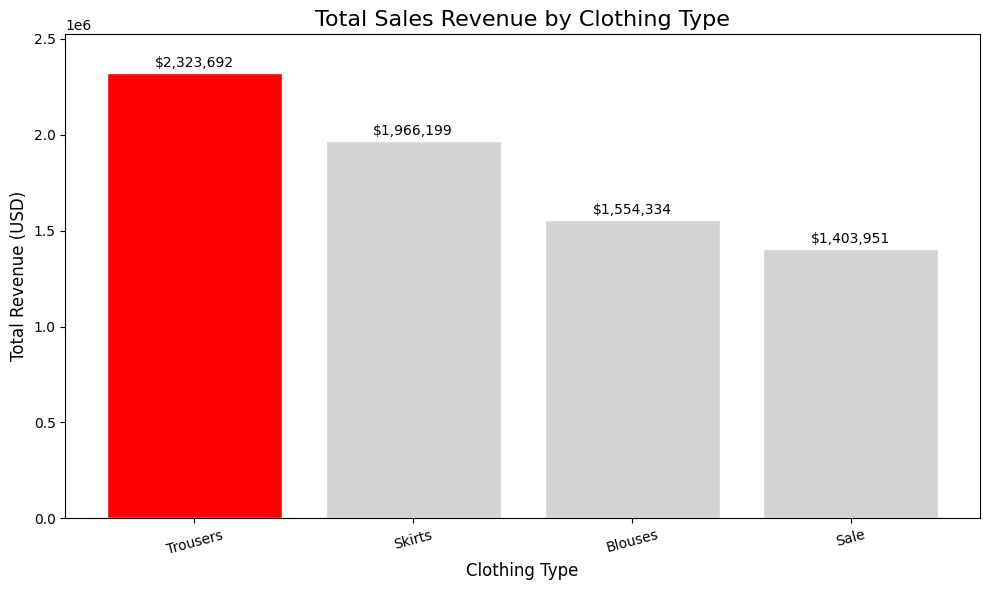

In [22]:

# Identify category with highest revenue
max_revenue_idx = type_summary['Total Revenue (USD)'].idxmax()

# Set bar colors: red for max, gray for others
revenue_colors = ['red' if idx == max_revenue_idx else 'lightgray' for idx in type_summary.index]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(type_summary.index,
              type_summary['Total Revenue (USD)'],
              color=revenue_colors,
              edgecolor='white')

# Set Y-axis limit 
max_revenue = type_summary['Total Revenue (USD)'].max()
ax.set_ylim(0, max_revenue + 200000)

# Titles and labels
ax.set_title('Total Sales Revenue by Clothing Type', fontsize=16)
ax.set_xlabel('Clothing Type', fontsize=12)
ax.set_ylabel('Total Revenue (USD)', fontsize=12)
ax.tick_params(axis='x', rotation=15)

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + 30000,
            f'${int(height):,}',
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()





### Observations:

- Trousers lead revenue generation with over 32%, followed by skirts and blouses, showing a clear premium-to-midrange structure.  

- Sale items, despite lower pricing, contribute nearly 20% - making them effective for volume-driven revenue and inventory clearance.


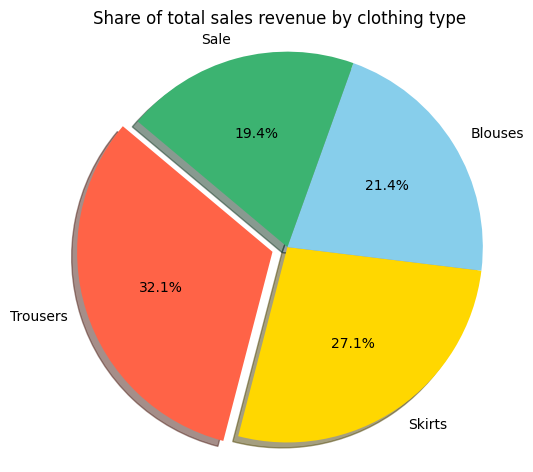

In [27]:


# Define colors and explode the top revenue category
colors = ['tomato', 'gold', 'skyblue', 'mediumseagreen']
explode = [0.08 if idx == type_summary['Total Revenue (USD)'].idxmax() else 0 for idx in type_summary.index]

# Smaller figure for Word compatibility
plt.figure(figsize=(5.2, 4.8))  # You can reduce this more if needed
plt.pie(
    type_summary['Total Revenue (USD)'],
    labels=type_summary.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    textprops={'fontsize': 10}
)

plt.title('Share of total sales revenue by clothing type', fontsize=12)
plt.axis('equal')  # Keep it circular
plt.tight_layout(pad=1.0)  # Less padding
plt.show()



### Takeaways and suggestions: 

- **Trousers are the revenue leader**, combining high demand and solid pricing. Keep them central in inventory planning, marketing, and bundling strategies.
  
- **Skirts are premium-priced and profitable** — they warrant focused promotions to boost sales volume and capitalize on their high margin.

- **Blouses and Sale items together account for 40.8% of revenue** — steady performers that add variety to the product mix.

- **Sale items aren't just for clearance** — contributing nearly one-fifth of income. Their impact can be increased through **limited-time deals** or **product bundles**.


### ***Product & customer behavior*** 

##### ***Impact of Model Photography on Purchases and Pricing***


In [28]:


# Step 2: Count purchases by photo type
photo_type_counts = df['model photography'].value_counts().rename(index={1: 'Frontal', 2: 'Profile'})

# Step 3: Average price by photo type
photo_type_avg_price = df.groupby('model photography')['price'].mean().rename(index={1: 'Frontal', 2: 'Profile'})

# Combine results
photo_type_stats = pd.concat([
    photo_type_counts.rename('Items Purchased'),
    photo_type_avg_price.rename('Avg Price')
], axis=1)

print(photo_type_stats)


                   Items Purchased  Avg Price
model photography                            
Frontal                     122439  45.382566
Profile                      43035  39.307076


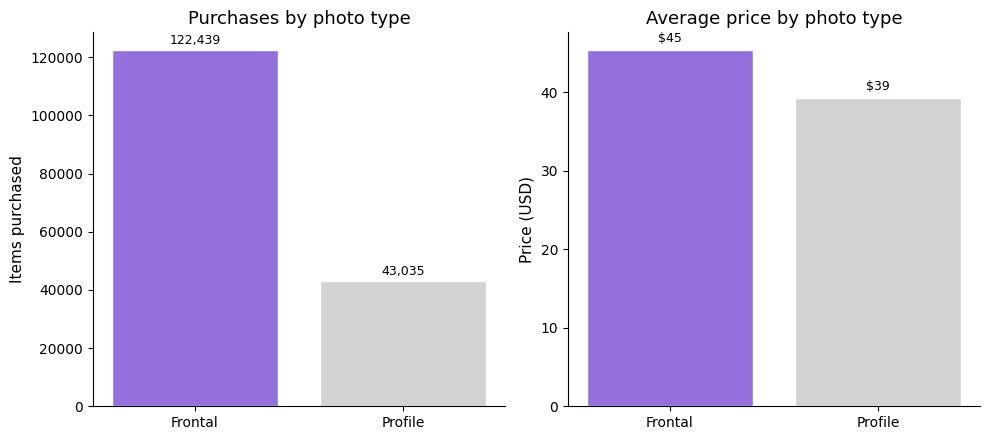

In [29]:
## Plot results

fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))  # Slightly smaller for Word

# Bar chart 1: Number of items purchased
bars1 = ax[0].bar(photo_type_stats.index,
                  photo_type_stats['Items Purchased'],
                  color=['mediumpurple', 'lightgray'],
                  edgecolor='white')

ax[0].set_title('Purchases by photo type', fontsize=13)
ax[0].set_ylabel('Items purchased', fontsize=11)
ax[0].tick_params(labelsize=10)

# Add data labels on top
for bar in bars1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2,
               height + 2000,
               f'{int(height):,}',
               ha='center', fontsize=9)

# Bar chart 2: Average price
bars2 = ax[1].bar(photo_type_stats.index,
                  photo_type_stats['Avg Price'],
                  color=['mediumpurple', 'lightgray'],
                  edgecolor='white')

ax[1].set_title('Average price by photo type', fontsize=13)
ax[1].set_ylabel('Price (USD)', fontsize=11)
ax[1].tick_params(labelsize=10)

# Add data labels on top
for bar in bars2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2,
               height + 1,
               f'${height:.0f}',
               ha='center', fontsize=9)

# Clean up spines
for spine in ['top', 'right']:
    ax[0].spines[spine].set_visible(False)
    ax[1].spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


#### ***Observations***

-  **Frontal model photography dominates** with ~122,000 purchases vs. ~43,000 for profile shots — a strong indicator of consumer preference.
-  **Frontal images are linked to higher average prices** ($45 vs. $39), suggesting they enhance perceived quality or appeal.

-  Recommendation: Prioritize **frontal photography** in listings, especially for:
  - New or premium products
  - High-margin or seasonal items
  - Bestsellers that rely on visual appeal
-  Consider updating current listings with **only profile views** to include frontal shots — this could improve both **conversion** and **pricing leverage**.

#### ***Influence of Color on Purchasing Behavior***

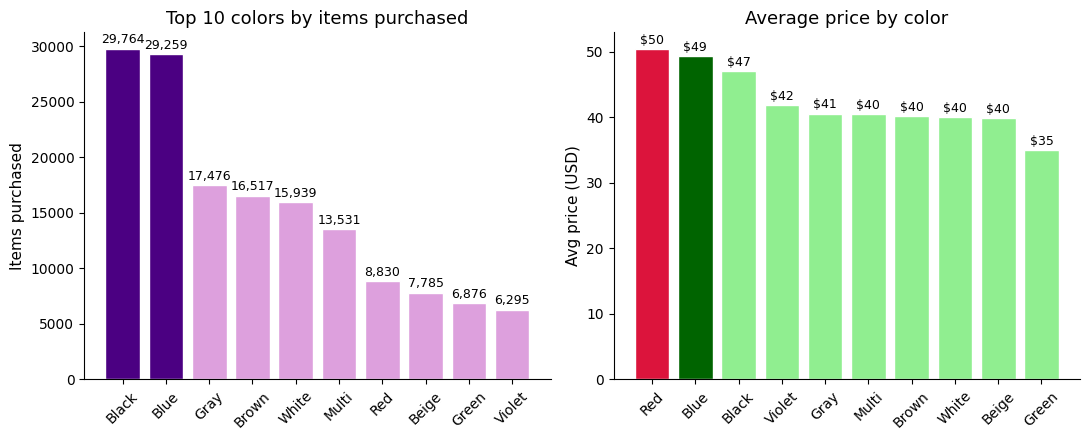

In [29]:
##Plot Results

# Step 2: Calculate stats
color_counts = df['colour'].value_counts().rename('Items Purchased')
color_avg_price = df.groupby('colour')['price'].mean().rename('Avg Price')

# Step 3: Combine and map color codes to names
color_stats = pd.concat([color_counts, color_avg_price], axis=1)

color_map = {
    1: 'Beige', 2: 'Black', 3: 'Blue', 4: 'Brown', 5: 'Burgundy',
    6: 'Gray', 7: 'Green', 8: 'Navy Blue', 9: 'Multi', 10: 'Olive',
    11: 'Pink', 12: 'Red', 13: 'Violet', 14: 'White'
}

color_stats.index = color_stats.index.map(color_map)

# Step 4: Keep top 10 colors by purchase count
top_colors = color_stats.sort_values(by='Items Purchased', ascending=False).head(10)

# Step 5a: Sort for each metric independently
purchase_sorted = top_colors.sort_values(by='Items Purchased', ascending=False)
price_sorted = top_colors.sort_values(by='Avg Price', ascending=False)

# Step 5b: Color logic – highlight top 2
purchase_colors = ['indigo'] * 2 + ['plum'] * (len(purchase_sorted) - 2)     # Purple tone
price_colors = ['crimson' if i == 'Red' else 'darkgreen' if i == 'Blue' else 'lightgreen'
                for i in price_sorted.index]

# Step 6: Plot
fig, ax = plt.subplots(1, 2, figsize=(11, 4.5))

# Plot 1: Top colors by purchases
bars1 = ax[0].bar(purchase_sorted.index, purchase_sorted['Items Purchased'], color=purchase_colors, edgecolor='white')
ax[0].set_title('Top 10 colors by items purchased', fontsize=13)
ax[0].set_ylabel('Items purchased', fontsize=11)
ax[0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height):,}', ha='center', fontsize=9)

# Plot 2: Avg price by color
bars2 = ax[1].bar(price_sorted.index, price_sorted['Avg Price'], color=price_colors, edgecolor='white')
ax[1].set_title('Average price by color', fontsize=13)
ax[1].set_ylabel('Avg price (USD)', fontsize=11)
ax[1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, height + 0.8, f'${height:.0f}', ha='center', fontsize=9)

# Clean up spines
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



#### ***Observations***

- **Black and Blue** are the most purchased colors, showing broad customer preference and mass appeal.
- **Red has the highest average price**, suggesting it's perceived as a premium or occasion-based color.
- High-priced, low-volume colors like **Red** may appeal to niche or gift-oriented buyers.
- **Underperforming colors** like **Beige, Green, and Violet** may need better presentation or reduced stock levels to optimize inventory efficiency.


### ***Price Prediction using Regression Models***


### Overview and Objective

This section outlines the development of regression models to **predict product prices** based on observable attributes in the e-commerce dataset.  
The objective is twofold:

1. **Business Insight**: Understand how features like **category**, **photography style**, and **color** influence pricing trends across listings.
2. **Anomaly Detection**: Enable detection of **pricing–perception mismatches** by comparing actual prices with model-predicted values.

By learning price patterns from past data, the models help reveal both **expected behaviors** and **outliers** in the pricing strategy.

### Features Used

Five categorical features were selected for modeling:
- **Model Photography**
- **Colour**
- **Main Product Category**
- **Location on Page**
- **Month**

These variables were **one-hot encoded** to prepare them for use in machine learning algorithms.

### Models Applied

Three regression models were implemented and evaluated:

- **Linear Regression** – Used as a baseline to capture linear relationships.
- **Random Forest Regressor** – Captures complex, non-linear interactions and provides feature importance.
- **XGBoost Regressor** – A high-performance boosting model with regularization to reduce overfitting.

All models were trained using an **80/20 train-test split** to evaluate generalization performance.


#### ***Prediction using Linear Regression***

In [30]:
features = [
    'model photography',
    'colour',
    'page 1 (main category)',
    'location',
    'month'
]

X = df[features]
y = df['price']


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing: One-hot encode all categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ]
)


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Pipeline
linreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
linreg_pipe.fit(X_train, y_train)

# Predict
y_pred = linreg_pipe.predict(X_test)

# Evaluate
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Linear Regression Results:
RMSE: 10.18
MAE: 8.49
R²: 0.35


### Linear Regression Results

The Linear Regression model serves as a baseline for price prediction. It captures only linear relationships between features and the target variable (price).

The relatively low R² indicates that a linear model explains only **35% of the variance** in prices, suggesting the presence of **non-linear relationships** better suited for tree-based models.


### ***Random Forest Regression model***

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit model
rf_pipe.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipe.predict(X_test)


In [34]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Random Forest Results:
RMSE: 6.66
MAE: 3.71
R²: 0.72


### Random Forest Regression Results

The Random Forest model significantly outperforms the linear baseline by capturing non-linear feature interactions.

The model explains **72% of the variance in prices**, demonstrating strong predictive performance and the usefulness of decision-tree ensembles for this task.


In [34]:
features = [
    'model photography',
    'colour',
    'page 1 (main category)',
    'location',
    'month'
]

# Step 1: Predict price on full dataset
df['predicted_price'] = rf_pipe.predict(df[features])

# Step 2: Calculate residuals
df['residual'] = df['price'] - df['predicted_price']


##### ***Random Forest Hyperparameter Tuning with GridSearchCV***

To improve model performance and ensure more reliable residual-based analysis, we tune the Random Forest using `GridSearchCV`.

- We define a **pipeline** combining preprocessing and modeling steps.
- A grid of hyperparameters is created for:
  - `n_estimators`: Number of trees in the forest
  - `max_depth`: Maximum depth of each tree
  - `min_samples_split`: Minimum number of samples required to split a node

This tuning helps the model capture relevant patterns more accurately while avoiding overfitting or underfitting.


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the model pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5]
}


In [36]:
grid_search = GridSearchCV(
    rf_pipe, 
    param_grid, 
    cv=3, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['model '
                                                                          'photography',
                                                                          'colour',
                                                                          'page '
                                                                          '1 '
                                                                          '(main '
                                                                          'category)',
                                                                          'location',
                                                                          'month'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

##### Model Training with Cross-Validated Grid Search

We perform **grid search with 3-fold cross-validation** to identify the best Random Forest configuration.  
The model is evaluated using **negative RMSE** (root mean squared error), which is minimized to improve prediction accuracy.

- `cv=3`: Ensures the model is validated on different data splits to generalize well.
- `n_jobs=-1`: Utilizes all available CPU cores to speed up the process.
- The best hyperparameter combination will be selected based on the **lowest average RMSE** across folds.


In [37]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print("Best Parameters:", grid_search.best_params_)

# Use best estimator for prediction
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate
rmse_best = root_mean_squared_error(y_test, y_pred_best_rf)
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
r2_best = r2_score(y_test, y_pred_best_rf)

print("\nTuned Random Forest Results:")
print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R²: {r2_best:.2f}")


Best Parameters: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

Tuned Random Forest Results:
RMSE: 6.66
MAE: 3.71
R²: 0.72


##### Best Model Selection and Performance

The best hyperparameters found via Grid Search were:

- `max_depth`: 20  
- `min_samples_split`: 2  
- `n_estimators`: 200  

The results match the earlier Random Forest performance, confirming the model is both well-optimized and reliable for downstream tasks like **residual analysis** and **pricing anomaly detection**.


##### ***XGBoost Regressor***

We train an **XGBoost Regressor**, a high-performance gradient boosting model, to further improve price prediction accuracy.


In [38]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0
    ))
])

# Fit the model
xgb_pipe.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipe.predict(X_test)


In [39]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Results:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")


XGBoost Regression Results:
RMSE: 6.66
MAE: 3.75
R²: 0.72


##### XGBoost Regression Results

The XGBoost model performs on par with the tuned Random Forest, offering robust prediction capabilities with regularization and gradient boosting.

XGBoost matches the Random Forest in predictive strength, confirming the dataset’s structure benefits from tree-based models that handle categorical interactions and non-linearity well.


#### ***Model Selection for Further Analysis***

While both the **tuned Random Forest** and **XGBoost** models achieved comparable performance (R² = 0.72, RMSE = 6.66),  
we proceed with the **tuned Random Forest model** for residual and anomaly analysis.

This decision is based on the fact that the Random Forest already delivers strong results **with simpler tuning and better interpretability**, making it more practical for business-driven insights.


In [43]:
# Get one-hot encoded feature names
ohe = preprocessor.named_transformers_['cat']
feature_names = ohe.get_feature_names_out(features)


In [44]:
import pandas as pd

rf_model = best_rf_model.named_steps['regressor']
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [45]:
print(importance_df.head())


                     Feature  Importance
19  page 1 (main category)_4    0.154031
18  page 1 (main category)_3    0.100092
20                location_1    0.070325
7                   colour_6    0.064953
15                 colour_14    0.061378


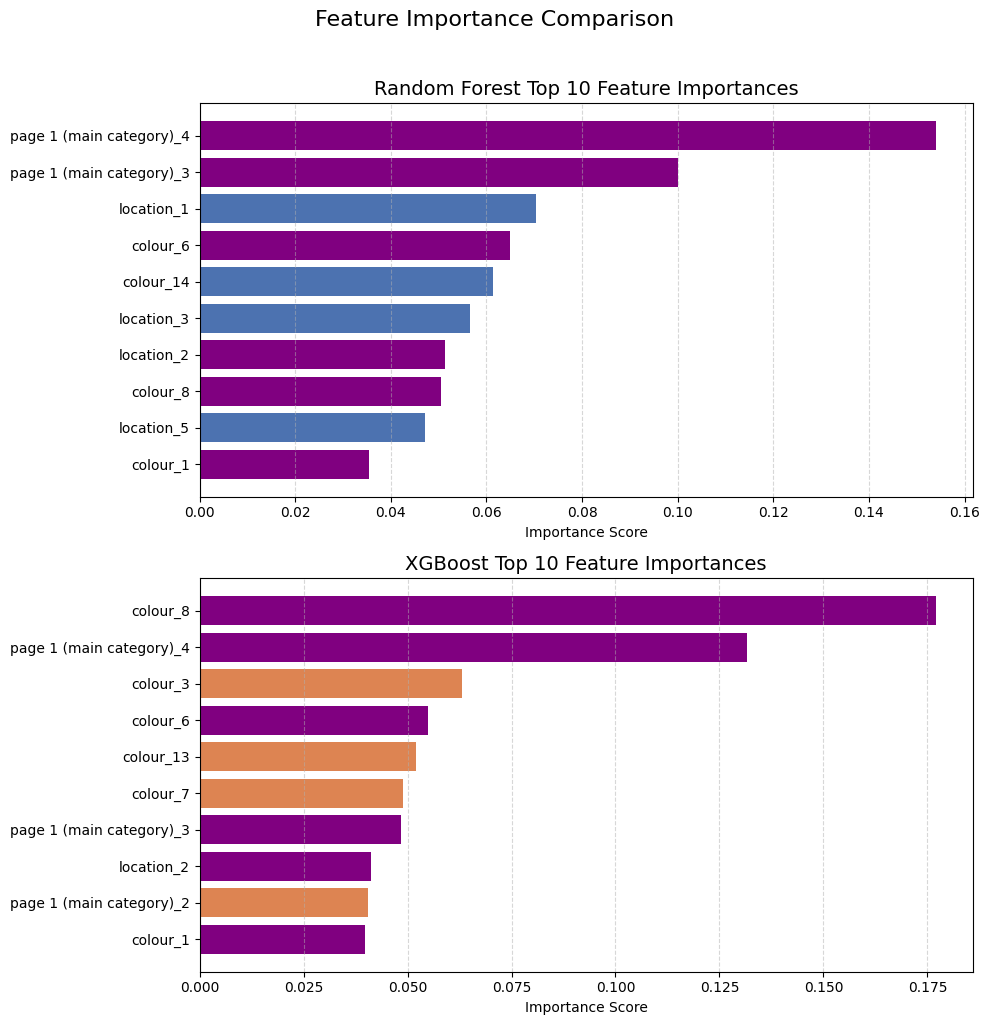

The Random Forest and XGBoost models share common features, and page 1 (main category)_4 (Sale) ranked at the top. That result shows that a product's sale status makes a difference to pricing decisions.


It means that the 'Sale' label has strong predictive power, most likely from steady pricing or price ranges on discounted goods. Product category, page position next to colors like navy blue and gray proved dependable signals. They help the model in better price estimates. The data shows that presentation and categorization provide price signals. 


***Product tier classification models***


In [47]:
df['price 2'].unique()

array([2, 1], dtype=int64)

In [48]:
# Map price_2 to binary: 1 = expensive, 0 = not expensive
df['price 2'] = df['price 2'].map({1: 1, 2: 0})


In [49]:
# Features and target
features = [
    'model photography',
    'colour',
    'page 1 (main category)',
    'location',
    'month'
]

X = df[features]
y = df['price 2']


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ]
)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create pipeline with preprocessing and model
clf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
clf_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model photography',
                                                   'colour',
                                                   'page 1 (main category)',
                                                   'location', 'month'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict
y_pred = clf_pipe.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6800725185073274
Precision: 0.6684762557318294
Recall: 0.7468935869501208
F1 Score: 0.7055125994326084

Confusion Matrix:
[[ 9824  6290]
 [ 4298 12683]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65     16114
           1       0.67      0.75      0.71     16981

    accuracy                           0.68     33095
   macro avg       0.68      0.68      0.68     33095
weighted avg       0.68      0.68      0.68     33095



In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_clf_pipe.fit(X_train, y_train)

# Predict
y_pred_rf = rf_clf_pipe.predict(X_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     16114
           1       0.87      0.89      0.88     16981

    accuracy                           0.88     33095
   macro avg       0.88      0.88      0.88     33095
weighted avg       0.88      0.88      0.88     33095


Confusion Matrix:
[[13932  2182]
 [ 1793 15188]]


In [55]:
df['predicted_price2'] = rf_clf_pipe.predict(df[features])


In [71]:
stricter_residual_threshold = df['residual'].quantile(0.90)
high_price_threshold = df['price'].quantile(0.75)



In [72]:
df['mispriced_strict'] = (
    (df['price'] > high_price_threshold) &
    (df['residual'] > stricter_residual_threshold) &
    (df['predicted_price2'] == 0)
)


In [73]:
print("Number of mispriced products (stricter):", df['mispriced_strict'].sum())


Number of mispriced products (stricter): 5840


In [74]:
cols_to_show = [
    'page 1 (main category)', 
    'page 2 (clothing model)', 
    'price', 
    'predicted_price', 
    'residual', 
    'predicted_price2', 
    'mispriced_strict'
]

mispriced_products = df[df['mispriced_strict']][cols_to_show]

# Preview
mispriced_products.head(5)


,page 1 (main category),page 2 (clothing model),price,predicted_price,residual,predicted_price2,mispriced_strict
9,2,B31,57,47.293856,9.706144,0,True
63,1,A3,72,54.550535,17.449465,0,True
195,1,A3,72,54.550535,17.449465,0,True
224,2,B31,57,47.293856,9.706144,0,True
281,1,A29,60,44.301371,15.698629,0,True


In [75]:
# Step 1: Map numeric category to actual names
category_map = {
    1: 'Trousers',
    2: 'Skirts',
    3: 'Blouses',
    4: 'Sale'
}
df['Product Category'] = df['page 1 (main category)'].map(category_map)

# Step 2: Filter only flagged items (strict residual)
flagged_df = df[df['mispriced_strict'] == True].copy()

# Step 3: Rename columns for clarity
flagged_df = flagged_df.rename(columns={
    'page 2 (clothing model)': 'Model Name',
    'price': 'Actual Price (€)',
    'predicted_price': 'Predicted Price (€)',
    'residual': 'Residual (€)',
    'predicted_price2': 'Predicted Tier (0=Budget)',
})

# Step 4: Reorder columns
cols_to_show = [
    'Product Category',
    'Model Name',
    'Actual Price (€)',
    'Predicted Price (€)',
    'Residual (€)',
    'Predicted Tier (0=Budget)',
    'mispriced_strict'
]
flagged_df = flagged_df[cols_to_show]

# Step 5: Drop duplicates to get unique product-model combinations
unique_flagged = flagged_df.drop_duplicates(subset=['Product Category', 'Model Name'])

# Step 6: Sort by residual and select top 10
top10_unique_flagged = unique_flagged.sort_values(by='Residual (€)', ascending=False).head(10)

# Step 7: Reset index for clean display
top10_unique_flagged.reset_index(drop=True, inplace=True)

# Display result
top10_unique_flagged



,Product Category,Model Name,Actual Price (€),Predicted Price (€),Residual (€),Predicted Tier (0=Budget),mispriced_strict
0,Trousers,A3,72,54.550535,17.449465,0,True
1,Trousers,A43,62,45.872430,16.127570,0,True
2,Trousers,A29,60,44.301371,15.698629,0,True
3,Skirts,B10,67,53.127749,13.872251,0,True
4,Blouses,C44,55,41.392725,13.607275,0,True
5,Trousers,A22,62,51.189294,10.810706,0,True
6,Skirts,B30,57,46.411356,10.588644,0,True
7,Skirts,B31,57,47.293856,9.706144,0,True


A total of 7 distinct products were flagged as potentially misaligned in terms of price and presentation. These items had high actual prices, were predicted to be worth significantly less by the regression model, and were also classified as budget-tier by the classification model. This suggests that certain products, especially trousers, skirts, and blouses, may warrant further review from a pricing or merchandising perspective.